# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("ex2data1.txt", sep=",", header=None, names=["Exam1","Exam2", "Admitted"])

In [3]:
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
# convert pandas dataframe to numpy matrix and split our data in X and y matrices
data_matrix = data.as_matrix()
X = data_matrix[:,0:2]
X = np.insert(X,0,np.ones(len(X)),axis=1) # insert column of ones for theta(0) vectorization
y = data_matrix[:,-1]

In [5]:
y = y.reshape((len(y),1))

In [6]:
# split our data into positive and negative cases
# add value from X at index i (until length of X) to the array "pos" if the y-value at the same index is equal to 1
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

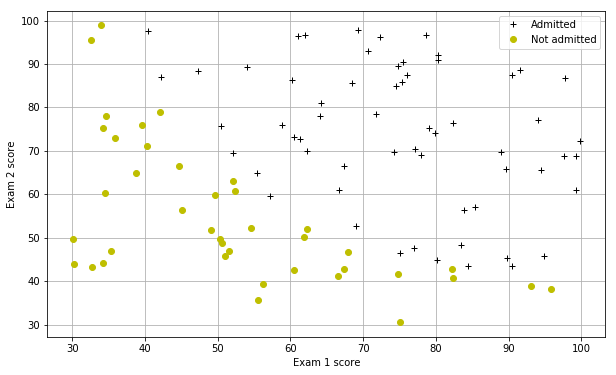

In [7]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1],pos[:,2],'k+',label='Admitted')
    plt.plot(neg[:,1],neg[:,2],'yo',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plotData()

# Sigmoid Hypothesis

<font size="5">
\begin{align}
h_\theta(x^{(i)})=g(\theta^Tx) \\
g(z)=\frac{1}{1+e^{-z}}
\end{align}
</font>

In [8]:
# define our sigmoid hypothesis
def sigmoid(x):
    return 1/(1+np.exp(-1*x))

In [9]:
# check whether our hypothesis is calculating correctly on matrices (note: sigmoid of 0 has to be 0.5)
sigmoid(np.matrix("1 2; 3 0"))

matrix([[ 0.73105858,  0.88079708],
        [ 0.95257413,  0.5       ]])

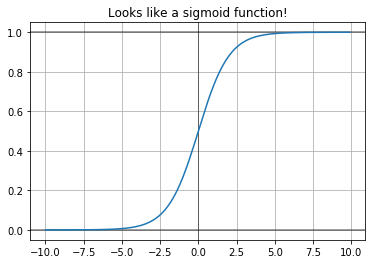

In [10]:
# Plot our sigmoid function to check whether hypothesis is working correctly
x_axis = np.arange(-10,10,0.1)
plt.axvline(0, c="black", linewidth=1, alpha=0.5)
plt.axhline(1, c="black", linewidth=1.5, alpha=0.5)
plt.axhline(0, c="black", linewidth=1.5, alpha=0.5)
plt.plot(x_axis, sigmoid(x_axis))
plt.grid(True)
plt.title("Looks like a sigmoid function!")

## Cost Function
<font size="5">
\begin{align}
J(\theta)=\frac{1}{m}\sum_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]
\end{align}
</font>

## Gradient
<font size="5">
\begin{align}
\frac{\partial J(\theta)}{\partial\theta_j}=\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
\end{align}
</font>

In [11]:
print("Shape of Matrix X: ", np.shape(X))
print("Shape of Matrix y: ", np.shape(y))

Shape of Matrix X:  (100, 3)
Shape of Matrix y:  (100, 1)


In [12]:
# define our cost function J for non-regularized use cases
def costFunction(theta,X,y):
    m = len(y)
    J = (1/m)*sum(np.dot(-y.T, np.log(sigmoid(np.dot(X,theta))))-np.dot((1-y).T,np.log(1-sigmoid(np.dot(X,theta)))))
    return J

In [13]:
# we define our gradient function separately since python optimizer functions do not need the gradient in order to do their magic!
def gradientFunction(theta, X,y):
    m = len(y)
    return 1/m * (np.dot((sigmoid(np.dot(X,theta))-y).T,X)).T;

In [14]:
(m,n) = np.shape(X)

In [15]:
# set our initial theta values to 0
initial_theta = np.zeros((n,1))

In [16]:
# calculate our cost with initial thetas all 0
costFunction(initial_theta,X,y)

array([ 0.69314718])

In [17]:
# we can use the fmin function from scipy.optimize as an alternative for Octave's fminunc!
from scipy.optimize import fmin

In [18]:
# note that scipy.optimize.fmin does not require a gradient! Only our cost function is required as input.
def optimizeTheta(theta, X,y,numIterations):
    result = fmin(costFunction, x0=theta, args=(X,y), maxiter=numIterations, full_output=True)
    return result[0].reshape(len(result[0]),1), result[1]

In [19]:
theta, mincost = optimizeTheta(initial_theta,X,y,400)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [20]:
theta

array([[-25.16130062],
       [  0.20623142],
       [  0.20147143]])

In [21]:
# calculate our new cost function with optimized theta values
costFunction(theta,X,y)

array([ 0.2034977])

In [22]:
# We need to classify a student with a score of 45 in Exam 1 and 85 in Exam 2
testStudent = np.matrix(("1, 45, 85")) # we expect a probability of 77.6 Percent

In [23]:
def predictProbability(newX):
    return sigmoid(np.dot(newX, theta))

In [24]:
def predictAdmission(newX):
    return 1 if predictProbability(newX) >= 0.5 else 0

In [25]:
predictAdmission(np.matrix(("1, 45,85")))

1

## Decision Boundary

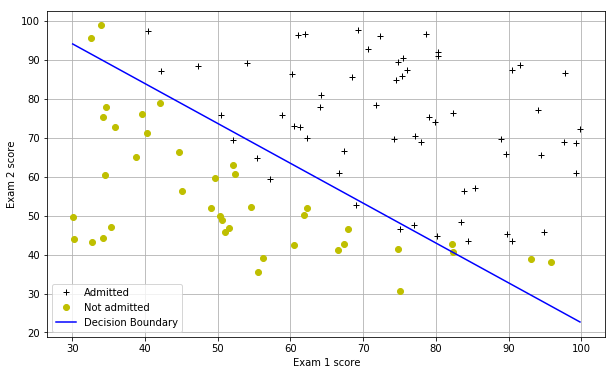

In [26]:
boundary_x = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_y = (-1./theta[2])*(theta[0]+theta[1]*boundary_x)
plotData()
plt.plot(boundary_x,boundary_y,'b-',label='Decision Boundary')
plt.legend()

# Regularization: Microchip Testing

In [27]:
data2 = pd.read_csv("ex2data2.txt", sep=",", header=None, names=["Test1","Test2", "Accepted"])

In [28]:
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [29]:
data2_matrix = data2.as_matrix()
X = data2_matrix[:,0:2]
X = np.insert(X,0,np.ones(len(X)),axis=1)
y = data2_matrix[:,-1].reshape(len(data2_matrix),1)

In [30]:
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

In [31]:
# check whether all elements have been classified into either 1 or 0
len(pos) + len(neg) == X.shape[0]

True

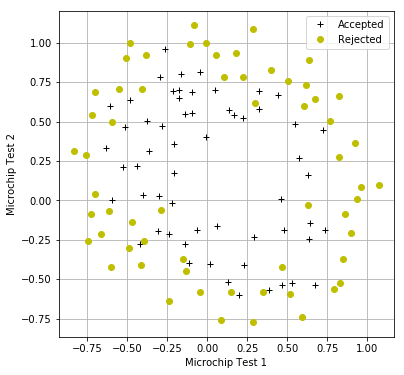

In [32]:
def plotData2():
    plt.plot(pos[:,1],pos[:,2],'k+',label='Accepted')
    plt.plot(neg[:,1],neg[:,2],'yo',label='Rejected')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(6,6))
plotData2()

In [33]:
print("Shape of Matrix X: ", np.shape(X))
print("Shape of Matrix y: ", np.shape(y))

Shape of Matrix X:  (118, 3)
Shape of Matrix y:  (118, 1)


In [34]:
#This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [35]:
#Create feature-mapped X matrix
mappedX = mapFeature(X[:,1],X[:,2])

In [36]:
# we now have 28 parameters instead of 3!
mappedX.shape

(118, 28)

## Regularized Cost Function
<font size="5">
\begin{align}
J(\theta)=\frac{1}{m}\sum_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]+\frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2
\end{align}
</font>

## Regularized Gradient
<font size="5">
\begin{align}
\frac{\partial J(\theta)}{\partial\theta_j}=[\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}] + \frac{\lambda}{m}\sum_{j=1}^n\theta_j^2
\end{align}
</font>

In [37]:
def costFunctionReg(theta, X,y, lmda):
    m = len(y)
    reg = (lmda/(2*m))*np.sum(theta[1:]**2)
    J = (1/m)*sum(np.dot(-y.T, np.log(sigmoid(np.dot(X,theta))))-np.dot((1-y).T, np.log(1-sigmoid(np.dot(X, theta)))))
    return J + reg

In [38]:
initial_theta = np.zeros((mappedX.shape[1],1))

In [39]:
costFunctionReg(initial_theta, mappedX,y,11)

array([ 0.69314718])

In [40]:
def gradientFunctionReg(theta, X,y, lmda):
    m = len(y)
    mask = np.ones(theta.shape) # create our mask matrix which is the identity matrix with a 0 in the first value
    mask[0] = 0
    
    # Our mask is used because we only want regularization for values theta(1) to theta(n), excluding theta(0)
    # by multiplying the theta vector times our mask, we exclude the first theta (by multiplying times 0)!
    return 1/m * (np.dot((sigmoid(np.dot(X,theta))-y).T,X)).T + (lmda/m)*(theta**mask)

In [41]:
gradientFunctionReg(initial_theta,mappedX,y,1)

array([[  1.69491525e-02],
       [  1.87880932e-02],
       [  7.77711864e-05],
       [  5.03446395e-02],
       [  1.15013308e-02],
       [  3.76648474e-02],
       [  1.83559872e-02],
       [  7.32393391e-03],
       [  8.19244468e-03],
       [  2.34764889e-02],
       [  3.93486234e-02],
       [  2.23923907e-03],
       [  1.28600503e-02],
       [  3.09593720e-03],
       [  3.93028171e-02],
       [  1.99707467e-02],
       [  4.32983232e-03],
       [  3.38643902e-03],
       [  5.83822078e-03],
       [  4.47629067e-03],
       [  3.10079849e-02],
       [  3.10312442e-02],
       [  1.09740238e-03],
       [  6.31570797e-03],
       [  4.08503006e-04],
       [  7.26504316e-03],
       [  1.37646175e-03],
       [  3.87936363e-02]])

In [42]:
test_theta = np.ones((mappedX.shape[1],1))

### Note that fmin does not converge because the maximum number of iterations is exceeded!
#### Because of this, we try another optimization alternative down below.

In [43]:
def optimizeThetaReg(theta, X,y,numIterations, lmda):
    result = fmin(costFunctionReg, x0=theta, args=(X,y, lmda), maxiter=numIterations, full_output=True)
    return result[0].reshape(len(result[0]),1), result[1]

In [44]:
lmda = 10
optimizeThetaReg(test_theta, mappedX,y,400, lmda)

(array([[-0.32638409],
        [ 0.45413572],
        [ 0.52921638],
        [ 0.67656455],
        [ 1.10205257],
        [ 0.49916194],
        [ 1.04995117],
        [ 1.30000987],
        [ 1.20634262],
        [ 0.71903228],
        [ 0.80387966],
        [ 1.04006545],
        [ 1.01204858],
        [ 1.43620859],
        [ 0.70678853],
        [ 1.11169828],
        [ 0.99737694],
        [ 1.14430095],
        [ 1.49957973],
        [ 1.17479367],
        [ 0.76774039],
        [ 1.07258512],
        [ 1.37678798],
        [ 1.34427654],
        [ 0.60306806],
        [ 1.1879283 ],
        [ 1.38700727],
        [ 1.34384662]]), 2.7764354593461511)

In [45]:
costFunctionReg(test_theta,mappedX,y, 10)

array([ 3.16450933])

### Minimize Theta using scipy.optimize.minimize with BFGS instead of .fmin

In [46]:
from scipy.optimize import minimize

def minimizeThetaReg(theta, X,y, lmda, numIterations):
    result = minimize(costFunctionReg, x0=theta, args=(X,y,lmda),method='BFGS', 
                      options={'gtol': 1e-6, 'disp': False, 'maxiter': numIterations})
    return result.x.reshape(theta.shape)

In [47]:
new_theta = minimizeThetaReg(test_theta,mappedX,y,lmda, 500)

In [48]:
new_theta

array([[ 0.32617798],
       [-0.00815051],
       [ 0.16579781],
       [-0.44671766],
       [-0.11177282],
       [-0.27891811],
       [-0.0714527 ],
       [-0.05788866],
       [-0.06509923],
       [-0.10637054],
       [-0.33672837],
       [-0.01297412],
       [-0.11670717],
       [-0.02809856],
       [-0.28602713],
       [-0.11614829],
       [-0.0370459 ],
       [-0.02242344],
       [-0.04886602],
       [-0.04163201],
       [-0.18675738],
       [-0.25333871],
       [-0.00291335],
       [-0.05796761],
       [-0.0005303 ],
       [-0.06352945],
       [-0.0120667 ],
       [-0.27148788]])

In [49]:
costFunctionReg(new_theta,mappedX,y,10)

array([ 0.6482157])

## Decision Boundaries

In [50]:
# This handy funcation has been taken from GitHub User kaleko and his notebook https://github.com/kaleko/CourseraML/blob/master/ex2/ex2.ipynb
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    theta = minimizeThetaReg(mytheta,myX,myy,mylambda,400)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(myfeaturesij,theta)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

#### As we can see, a value of lambda = 0 leads to heavy overfitting of our data while a value of lambda = 100 leads to underfitting.

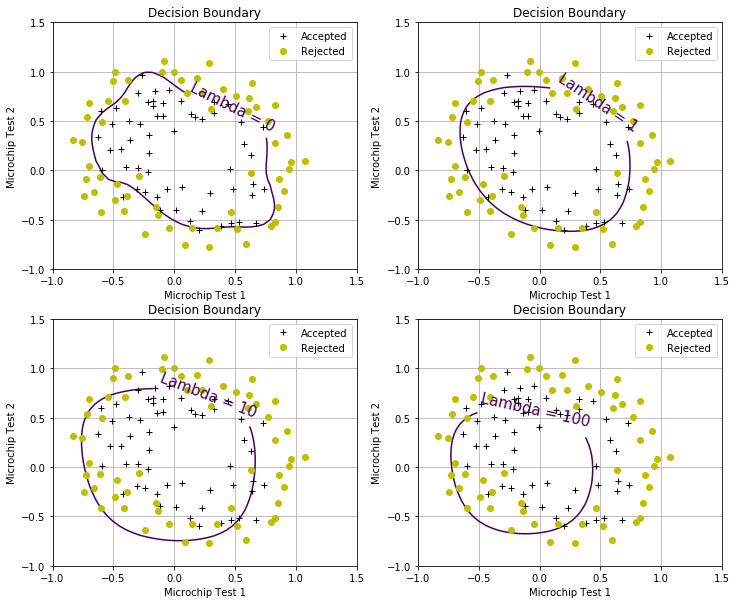

In [51]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData2()
plotBoundary(test_theta,mappedX,y,0.)

plt.subplot(222)
plotData2()
plotBoundary(test_theta,mappedX,y,1.)

plt.subplot(223)
plotData2()
plotBoundary(test_theta,mappedX,y,10.)

plt.subplot(224)
plotData2()
plotBoundary(test_theta,mappedX,y,100.)